## Homework #5. Exploratory Data Analysis
#### Author: `Anton Marynych`
#### Total time spent on h/w (in minutes): `720`

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
DIALOGS_MERGED_DATA_PATH = "../data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "../data/merged_data/dialogs_users_all.csv"
DIALOG_ZAKHAR = '../data/dialogs/356803362.csv'
DIALOG_SOFIA = '../data/dialogs/346039675.csv'
DIALOG_NIKITA = '../data/dialogs/460364073.csv'
DIALOG_IGOR = '../data/dialogs/338959697.csv'

In [3]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)
df_zakhar = pd.read_csv(DIALOG_ZAKHAR)
df_zakhar_clear = df_zakhar.copy()


## Topic 1. Zakhar
In this section I am going to analyze my chat with my friend Zakhar and check, if the outcome matches my expectations.

## Question 1 *
### When do we chat more actively with my friend Zakhar? 

#### Why did I choose this question? 
Our activity in this chat mostly represent our free time, because we don't study or work together. It is also nice to see, when do we both usually sleep.

'my plot'

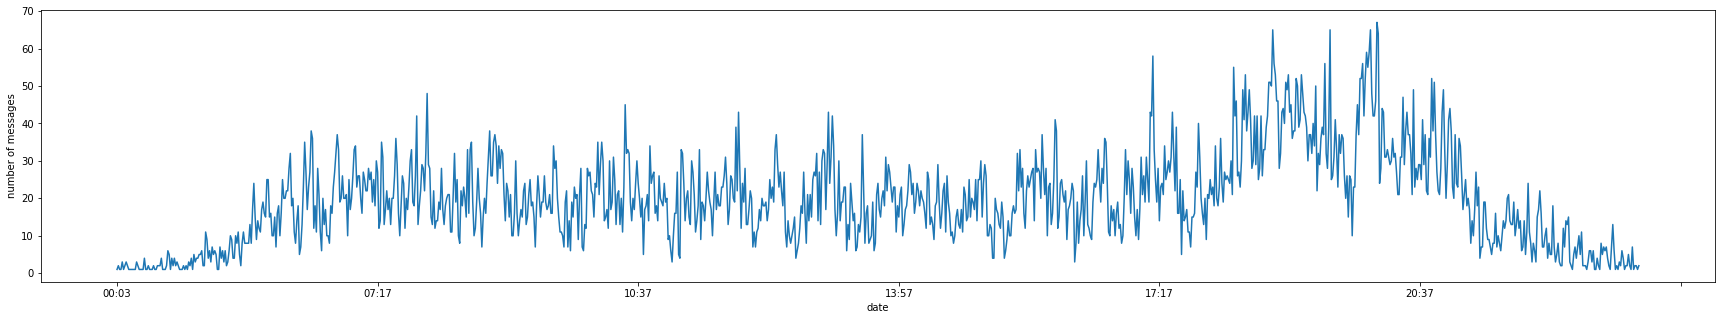

In [4]:
import matplotlib.pyplot as plt
def cut_time(str):
    return str[11:16]

df_zakhar['date'] = df_zakhar['date'].astype(str)

df_zakhar['date'] = df_zakhar['date'].apply(cut_time)
df_zakhar_date = df_zakhar['date'].value_counts().rename_axis('date').reset_index(name='amount_of_messages')
df_zakhar_date.astype({'date': 'datetime64[ns]'})
df_zakhar_date = df_zakhar_date.sort_values(by=['date'])
df_zakhar_date = df_zakhar_date.set_index('date')

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.ylabel('number of messages')
df_zakhar_date['amount_of_messages'].plot()
'my plot'

'my plot'

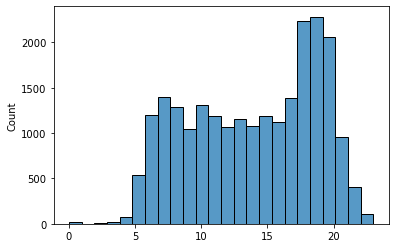

In [5]:
import seaborn as sns
arr = df_zakhar['date']
arr_final = []
for i in arr:
    first = int(i[0:2])
    arr_final.append(first)  
# print(arr_final)    
sns.histplot(arr_final, bins=24)    
'my plot'    

#### Conclusion:
As we can see on the chart, the amount of messages sent in the night is very low. Then it starts growing in the morning and around 6:00 it reaches normal amount which remains almost the same during the day. The activity is the highest during the evening between 17-21. It also reaches it's own peak during this period. Then after around 21:00 the activity rapidly goes down and becomes the lowest around 00:00.
So, I've got the results that match my expectations. Our free time starts around 17-18 and lasts roughly to 21:00. And our sleeping time looks quite nice and healthy.

## Question 2 
### What English top football club is mentioned the most?

#### Why did I choose this question? 
Since we are both football fans, it is interesting to know, which English football club is mentioned the most in our chat. I consider Arsenal, Liverpool, ManCity, ManUnited, Totenham, Chelsea to be English top clubs.

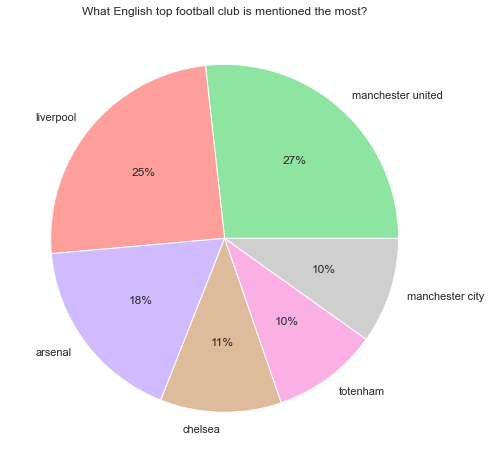

In [64]:
def identifyer(str):
    if('arsenal' in str or 'арсенал' in str):
        return 'arsenal'
    if('мю' in str or 'манюнайтед' in str or 'mu' in str):
        return 'manchester united'
    if('totenham' in str or 'тотенхэм' in str or 'тотенхем' in str or 'тотнем' in str or 'ттх' in str):
        return 'totenham'
    if('челси' in str or 'челсі' in str or 'chelsea' in str):
        return 'chelsea'
    if('мансити' in str or 'сити' in str or 'city' in str or 'мансіті' in str):
        return 'manchester city'
    if(('лівер' in str) or ('ливер' in str) or ('liver' in str)):
        return 'liverpool'
        
       

list_football = []
df_zakhar['message'] = df_zakhar['message'].astype(str)
for i in range (df_zakhar.shape[0]):
    temp_arr = df_zakhar.iloc[i]['message'].split(" ")
    for word in temp_arr:
        word.strip()
        if(('arsenal' in word) or 
           ('арсенал' in word) or (word=='мю') or ('манюнайтед' in word) or 
           (word=='mu') or ('тотнем' in word) or ('тотенхем' in word) or ('тхх' in word) or ('totenham' in word) or ('тотенхэм' in word) or 
           ('челси' in word) or 
           ('челсі' in word) or ('chelsea' in word) or ('мансіті' in word) or ('мансити' in word) or (word == 'city') or (word == 'mancity') or (word == 'сіті') or (word == 'сити') or ('liver' in word) or ('лівер' in word) or ('ливер' in word)): 
            list_football.append(word)

data_football = pd.DataFrame(list_football)

data_football.set_axis(['team'], axis='columns', inplace=True)
data_football['team'] = data_football['team'].apply(identifyer)


colors = sns.color_palette('pastel')[2:10]
data_football2 = data_football['team'].value_counts().rename_axis('team').reset_index(name='amount_of_mentions')

plt.pie(data_football2['amount_of_mentions'], labels=data_football2['team'], colors = colors, autopct='%.0f%%')
plt.title('What English top football club is mentioned the most?')
plt.show()

## Question 3
### Top 10 popular words in the chat (10+ characters)




In [7]:
list_messages = []
df_zakhar['message'] = df_zakhar['message'].astype(str)
for i in range (df_zakhar.shape[0]):
    temp_arr = df_zakhar.iloc[i]['message'].split(" ")
    for word in temp_arr:
        word.strip()
        if(len(word)>9 and word.isalpha and not(" " in word)): list_messages.append(word)
            
df_zakhar_messages = pd.DataFrame(list_messages)
df_zakhar_messages.set_axis(['message'], axis='columns', inplace=True)
df_zakhar_messages_top = df_zakhar_messages['message'].value_counts().rename_axis('word').reset_index(name='amount_of_words')
df_zakhar_messages_top.head(10)

,word,amount_of_words
0,посмотреть,18
1,демеевской,17
2,Patriarchate,14
3,контрактовой,14
4,Metropolitanate,13
5,подивитись,11
6,Ахахахахах,10
7,действительно,10
8,справедливо,9
9,закінчиться,9


## Question 4 
### In what season do we mostly speak?

#### Why did I choose this question? 
It is interesting to see, when we are more busy, and when we have more time to talk to each other.

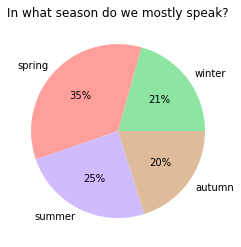

In [8]:
def cut_month(str):
    return (str[0:7])
def month_id(str):
    return str[5:7]
df_zakhar_seasons = df_zakhar_clear.copy()
df_zakhar_seasons['date'] = df_zakhar_seasons['date'].apply(cut_month)
df_zakhar_seasons = df_zakhar_seasons.loc[df_zakhar_seasons['date']>'2020-10']
df_zakhar_seasons['date'] = df_zakhar_seasons['date'].apply(month_id)
df_zakhar_summer = df_zakhar_seasons.loc[(df_zakhar_seasons['date'] == '06') | (df_zakhar_seasons['date'] == '07') | (df_zakhar_seasons['date'] == '08')]
df_zakhar_autumn = df_zakhar_seasons.loc[(df_zakhar_seasons['date'] == '09') | (df_zakhar_seasons['date'] == '10') | (df_zakhar_seasons['date'] == '11')]
df_zakhar_winter = df_zakhar_seasons.loc[(df_zakhar_seasons['date'] == '12') | (df_zakhar_seasons['date'] == '01') | (df_zakhar_seasons['date'] == '02')]
df_zakhar_spring = df_zakhar_seasons.loc[(df_zakhar_seasons['date'] == '03') | (df_zakhar_seasons['date'] == '04') | (df_zakhar_seasons['date'] == '05')]
data_seasons = {'season': ['winter','spring','summer','autumn'],
               'percentage': [df_zakhar_winter.shape[0]/df_zakhar_seasons.shape[0]*100,
                              df_zakhar_spring.shape[0]/df_zakhar_seasons.shape[0]*100,
                             df_zakhar_summer.shape[0]/df_zakhar_seasons.shape[0]*100,
                             df_zakhar_autumn.shape[0]/df_zakhar_seasons.shape[0]*100]}
df_seasons = pd.DataFrame(data_seasons)


colors = sns.color_palette('pastel')[2:10]
plt.pie(df_seasons['percentage'], labels=df_seasons['season'], colors = colors, autopct='%.0f%%')
plt.title('In what season do we mostly speak?')
plt.show()

## Question 5 
### Who mostly invites for Discord?

#### Why did I choose this question? 
We often chat through discord and it is interesting to know, who usually offers to chat.

[Text(0.5, 1.0, 'Who mostly invites for discord?')]

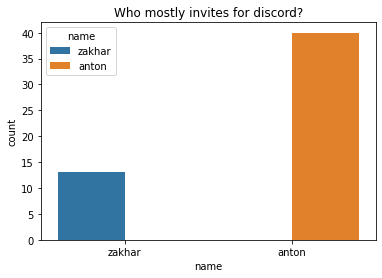

In [9]:
list_discord = []
df_zakhar['message'] = df_zakhar['message'].astype(str)
score=0
for i in range (df_zakhar.shape[0]):
    temp_arr = df_zakhar.iloc[i]['message'].split(" ")
    for word in temp_arr:
        word.strip()
        if(word == 'дс' or word == 'дс?' or word == 'ds' or word == 'discord' or word == 'діс?' or word == 'дис?' or word == 'дис' or word == 'дискорд?' or word == 'дискорд' or word == 'ds?' or word == 'діс?'):
            if(df_zakhar.iloc[i]['to_id'] == 356803362): 
                list_discord.append('anton')
                
            else: 
                list_discord.append('zakhar')
# data_discord = {'quantity': [anton_score,zakhar_score],
#                 'name': ['anton', 'zakhar']}
df_discord = pd.DataFrame(list_discord)
df_discord.set_axis(['name'], axis='columns', inplace=True)
sns.countplot(data=df_discord, x='name', hue='name').set(title='Who mostly invites for discord?')

## Question 6 *
### How often do we mention one piece?

#### Why did I choose this question? 
This is our favourite anime and we watch/read it weekly. It is interesting to know, how did the popularity of this anime grew in our chat.

'mentioning one piece in chat'

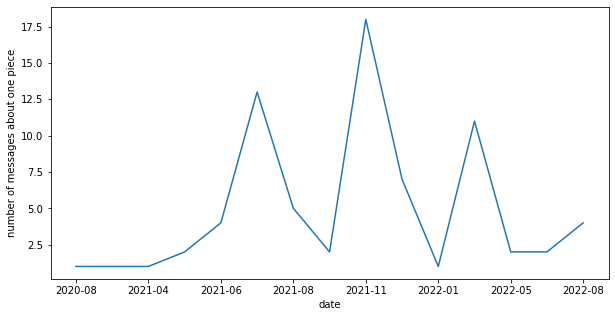

In [10]:
def cut_month(str):
    return (str[0:7])

df_zakhar_clear['message'] = df_zakhar_clear['message'].str.lower()
df_zakhar_clear['message'] = df_zakhar_clear['message'].astype(str)
df_zakhar_one_piece = df_zakhar_clear.loc[(df_zakhar_clear['message'].str.contains('one piece')) | 
                                         (df_zakhar_clear['message'].str.contains('ван пис')) |
                                        
                                         (df_zakhar_clear['message'].str.contains('луфи')) |
                                         (df_zakhar_clear['message'].str.contains('луффи')) |
                                         (df_zakhar_clear['message'].str.contains('зорро')) |
                                         (df_zakhar_clear['message'].str.contains('зоро')) |
                                         (df_zakhar_clear['message'].str.contains('новая глава')) |
                                         
                                         (df_zakhar_clear['message'].str.contains('робин')) |
                                         (df_zakhar_clear['message'].str.contains('робін')) |
                                         (df_zakhar_clear['message'].str.contains('шанкс')) |
                                         (df_zakhar_clear['message'].str.contains('вегапанк')) |
                                         (df_zakhar_clear['message'].str.contains('кайдо')) |
                                         (df_zakhar_clear['message'].str.contains('мамочка')) |
                                         (df_zakhar_clear['message'].str.contains('новая глава')) |
                                         (df_zakhar_clear['message'].str.contains('гарп')) |
#                                          (df_zakhar_clear['message'].str.contains('вано')) |
                                         (df_zakhar_clear['message'].str.contains('ямато'))
                                         ]

df_zakhar_one_piece['date'] = df_zakhar_one_piece['date'].apply(cut_month)

df_zakhar_one_piece1 = df_zakhar_one_piece['date'].value_counts().rename_axis('date').reset_index(name='amount') 
df_zakhar_one_piece1.astype({'date': 'datetime64[ns]'})
df_zakhar_one_piece1 = df_zakhar_one_piece1.sort_values(by=['date'])
df_zakhar_one_piece1 = df_zakhar_one_piece1.set_index('date')
df_zakhar_one_piece1.head(50)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.ylabel('number of messages about one piece')
df_zakhar_one_piece1['amount'].plot()
'mentioning one piece in chat'


## Question 7 *
### When does Zakhar send me tiktoks during the day?

#### Why did I choose this question? 
It is very representetive to track when does Zakhar use tiktok.

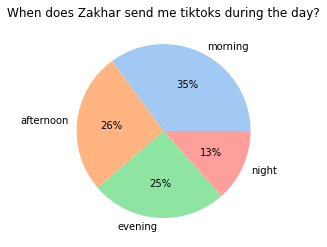

In [11]:
def cutter_hours(str):
    return str[0:2]
def gather(str):
    if(str=='00' or str=='01' or str=='02' or str=='03' or str=='04' or str=='05'):
        return 'night'
    
    if(str=='06' or str=='07' or str=='08' or str=='09' or str=='10' or str=='11'):
        return 'morning'
    
    if(str=='12' or str=='13' or str=='14' or str=='15' or str=='16' or str=='17'):
        return 'afternoon'
    
    if(str=='18' or str=='19' or str=='20' or str=='21' or str=='22' or str=='23'):
        return 'evening'
    

df_zakhar_tiktoks = df_zakhar.loc[df_zakhar['message'].str.contains('tiktok.com')]

df_zakhar_tiktoks = df_zakhar_tiktoks.loc[df_zakhar_tiktoks['to_id'] == 381081723]

df_zakhar_tiktoks1 = df_zakhar_tiktoks['date'].value_counts().rename_axis('date').reset_index(name='amount_of_tiktoks')

df_zakhar_tiktoks1.astype({'date': 'datetime64[ns]'})
df_zakhar_tiktoks1 = df_zakhar_tiktoks1.sort_values(by=['date'])

df_zakhar_tiktoks1['date'] = df_zakhar_tiktoks1['date'].apply(cutter_hours)
df_zakhar_tiktoks1['date'] = df_zakhar_tiktoks1['date'].apply(gather)
df_zakhar_tiktoks1.head(50)

colors = sns.color_palette('pastel')[0:5]
df_zakhar_tiktoks2 = df_zakhar_tiktoks1['date'].value_counts().rename_axis('date').reset_index(name='amount_of_tiktoks')

plt.pie(df_zakhar_tiktoks2['amount_of_tiktoks'], labels=df_zakhar_tiktoks2['date'], colors = colors, autopct='%.0f%%')
plt.title('When does Zakhar send me tiktoks during the day?')
plt.show()

## Question 8
### How many tiktoks does Zakhar send me per day (in 2022)?


In [12]:
df_zakhar_2022 = df_zakhar_clear.loc[df_zakhar_clear['date'].str.contains('2022')]
# df_zakhar_tiktoks_2022 = df_zakhar_2022.loc[df_zakhar_2022['message'].str.contains('tiktok.com')]
tiktoks = 0
df_zakhar_tiktoks_2022 = df_zakhar_2022.loc[df_zakhar_2022['to_id'] == 381081723]
df_zakhar_tiktoks_2022['message'] = df_zakhar_tiktoks_2022['message'].astype(str)
for i in range(df_zakhar_tiktoks_2022.shape[0]):
    if("tiktok.com" in df_zakhar_tiktoks_2022.iloc[i]['message']):
        tiktoks+=1
print("The average number of tiktoks that I get from Zakhar is ", str(tiktoks/302),' per day.')

The average number of tiktoks that I get from Zakhar is  0.6390728476821192  per day.


#### Conclusion:
##### English clubs:
The English club we mention the most in our chat is Manchecter United. The result is as I expected it to be, because we are both big fans of Mr Sui and since there is a lot going on with Manchecter United there is no wonder why we mention it so often in our chat.
##### Popular words in the chat:
That's definetly not the smartest question on the list, but if we look at top 10 most popular words in the chat that have at least ten letters, we can get some interesting information. Because if we often say some long words that means those unusual words have some special meaning to us. If we look at the words 'демеевской' and 'контрактовой' they can tell that those locations in Kyiv are nor random for us. That is where we usually meet, because those are the metro stations we live close by.
##### In what season do we mostly speak:
This is the one that gave the most unexpexted results. I thought that we would chat more suring summer, but there is a distinct leader, which is spring. Though, I am not surprised about the fact that we chat less during autumn and winter, beacause those are the seasons when we are usually more busy.
##### Who invites for discord:
I am totally not surprised with the result here. It really feels like I am the one, who is always offering to have a call on discord.
##### When do we mention One Piece:
This chart is perfect, because it is perfectly reflects major events in our one piece related life.
There are 3 points where the y is very high. First is when I finished watching the anime. Second is when I started reading manga. And the third one is during the 5th gear revelation (major event in the manga). So I really liked the results.
##### When does he send me tiktoks:
I thought that the result will be morning, because that's how it feels like from real life and it actually was. However, I thought there would be a bigger margin.
##### Average number of tiktoks per day:
I thought it would be a bit higher but I am satisfied with the result of near 0,64 tiktoks/day.

## Topic 2. Tiktok
In this section I am going to analyze my and my friends behaviour related to tiktok.

## Question 9
### Compare popularity of tiktok/youtube/instagram in my messages.

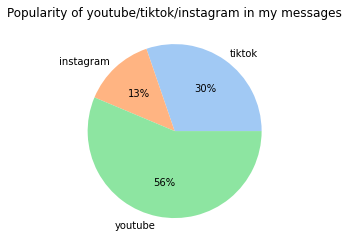

In [13]:
df['message'] = df['message'].astype(str)
df_youtube10 = df.loc[df['message'].str.contains('https://youtu')]
df_tiktok10 = df.loc[df['message'].str.contains('tiktok.com')]
df_instagram10 = df.loc[df['message'].str.contains('instagram.com')]
data_links = {'site':['tiktok','instagram','youtube'],
             'quantity':[df_tiktok10.shape[0], df_instagram10.shape[0], df_youtube10.shape[0]]}
df_links = pd.DataFrame(data_links)  



colors = sns.color_palette('pastel')[0:5]
plt.pie(df_links['quantity'], labels=df_links['site'], colors = colors, autopct='%.0f%%')
plt.title('Popularity of youtube/tiktok/instagram in my messages')
plt.show()

## Question 10
### Top 5 people who send me the most tiktoks

In [14]:
def name_changer(id):
    names = df_meta[['users']]
    normal_names = names.loc[names['users'].str.contains(id)]
    if normal_names.empty:
        return "user_without_telegram_tag"
    normal_names=normal_names.reset_index(drop=True)
    list = normal_names['users'][0].split(',')
    return list[1][16:-1]


df_tiktok_to_me = df_tiktok10.loc[df_tiktok10['to_id'] == '381081723']
df_tiktok_to_me1 = df_tiktok_to_me['dialog_id'].value_counts().rename_axis('name').reset_index(name='quantity')


df_tiktok_to_me1['name'] = df_tiktok_to_me1['name'].astype(str)

df_tiktok_to_me1['name'] = df_tiktok_to_me1['name'].apply(name_changer)
df_tiktok_to_me1 = df_tiktok_to_me1.reset_index(drop=True)

df_tiktok_to_me1.head(5)

,name,quantity
0,Nikita,1241
1,Zakhar,429
2,Sofia,48
3,Anton,24
4,лɐlsoʇɐıлs,14


## Question 11
### Top 5 people to whom I sent tiktoks

In [15]:
df_tiktok10['from_id'] = df_tiktok10['from_id'].astype(str)
df_tiktok_from_me = df_tiktok10.loc[df_tiktok10['from_id'].str.contains('381081723')]
df_tiktok_from_me1 = df_tiktok_from_me['dialog_id'].value_counts().rename_axis('name').reset_index(name='quantity')

df_tiktok_from_me1['name'] = df_tiktok_from_me1['name'].astype(str)
df_tiktok_from_me1['name'] = df_tiktok_from_me1['name'].apply(name_changer)
df_tiktok_from_me1 = df_tiktok_from_me1.reset_index(drop=True)

df_tiktok_from_me1.head(5)

,name,quantity
0,Zakhar,316
1,Nikita,226
2,Sofia,77
3,user_without_telegram_tag,48
4,Anton,17


## Question 12 *
### Track the number of sent tiktoks through time? Is it visible, when I deleted tiktok?

#### Why did I choose this question? 
Since I deleted tikrok in July, I want to see, how it reflects the quantity of the tiktoks I send per month.

'number of tiktoks that I have sent'

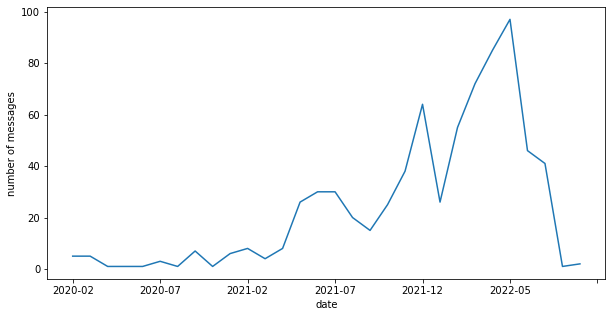

In [16]:
df_me = df.loc[df['from_id'] == 'PeerUser(user_id=381081723)']
df_me_tiktoks  = df_me.loc[df_me['message'].str.contains('tiktok.com')]



df_me_tiktoks['date'] = df_me_tiktoks['date'].apply(cut_month)

df_me_tiktoks1 = df_me_tiktoks['date'].value_counts().rename_axis('date').reset_index(name='amount') 
df_me_tiktoks1.astype({'date': 'datetime64[ns]'})
df_me_tiktoks1 = df_me_tiktoks1.sort_values(by=['date'])
df_me_tiktoks1 = df_me_tiktoks1.set_index('date')


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.ylabel('number of messages')
df_me_tiktoks1['amount'].plot()
'number of tiktoks that I have sent'

#### Conclusion:
##### Compare popularity of youtube/tiktok/instagram:
The results are not suprising, because I almost don't use instagram and youtube is definetly out there for a longer amount of time. So, no wonder youtube won.
##### Top5 people who send me (or vice-versa) tiktoks:
Theese results look very predictible to me.
##### Is it visible when I deleted tiktok:
Yes, it is! It looks like the amount of time I spend there was rapidly growing, so that was definetly a right decision to delete it.

## Topic 3. Friends
In this section I am going to analyze data related to my four close friends. Their names are Zakhar, Sofia, Nikita and Igor.

In [17]:
df_sofia = pd.read_csv(DIALOG_SOFIA)
df_nikita = pd.read_csv(DIALOG_NIKITA)
df_igor = pd.read_csv(DIALOG_IGOR)
df_zakhar_clear.head()

frames = [df_sofia, df_nikita, df_igor, df_zakhar_clear]

df_friends = pd.concat(frames)


## Question 13
### Who texts me the most during the night?
#### Why did I choose this question? 
It is interesting to see, who among my friends usually sleeps at night instead of texting me.

[Text(0.5, 1.0, 'Who of my friends texts me the most at night?')]

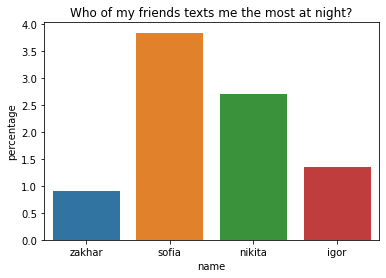

In [18]:
def cut_hours(str):
    return str[11:13]
def night(str):
    if('23' in str or str=='00' or str=='01' or str=='02' or str=='03' or str=='04'):
        return 'night'
    else: return 'mmmm'
    
df_zakhar_time = df_zakhar_clear.copy()
df_zakhar_time['date'] = df_zakhar_time['date'].astype(str)
df_zakhar_time['date'] = df_zakhar_time['date'].apply(cut_hours)

df_zakhar_time['date'] = df_zakhar_time['date'].apply(night)
df_zakhar_time_night = df_zakhar_time.loc[df_zakhar_time['date'] == 'night']
df_zakhar_time_night = df_zakhar_time_night.loc[df_zakhar_time_night['to_id'] == 381081723]


df_sofia_time = df_sofia.copy()
df_sofia_time['date'] = df_sofia_time['date'].astype(str)
df_sofia_time['date'] = df_sofia_time['date'].apply(cut_hours)

df_sofia_time['date'] = df_sofia_time['date'].apply(night)
df_sofia_time_night = df_sofia_time.loc[df_sofia_time['date'] == 'night']
df_sofia_time_night = df_sofia_time_night.loc[df_sofia_time_night['to_id'] == 381081723]




df_nikita_time = df_nikita.copy()
df_nikita_time['date'] = df_nikita_time['date'].astype(str)
df_nikita_time['date'] = df_nikita_time['date'].apply(cut_hours)

df_nikita_time['date'] = df_nikita_time['date'].apply(night)
df_nikita_time_night = df_nikita_time.loc[df_nikita_time['date'] == 'night']
df_nikita_time_night = df_nikita_time_night.loc[df_nikita_time_night['to_id'] == 381081723]


df_igor_time = df_igor.copy()
df_igor_time['date'] = df_igor_time['date'].astype(str)
df_igor_time['date'] = df_igor_time['date'].apply(cut_hours)

df_igor_time['date'] = df_igor_time['date'].apply(night)
df_igor_time_night = df_igor_time.loc[df_igor_time['date'] == 'night']
df_igor_time_night = df_igor_time_night.loc[df_igor_time_night['to_id'] == 381081723]


df_zakhar_to_me = df_zakhar_clear.loc[df_zakhar_clear['to_id'] == 381081723]
df_sofia_to_me = df_sofia.loc[df_sofia['to_id'] == 381081723]
df_nikita_to_me = df_nikita.loc[df_nikita['to_id'] == 381081723]
df_igor_to_me = df_igor.loc[df_igor['to_id'] == 381081723]



data_friends_night = {'name': ['zakhar','sofia','nikita','igor'],
                      'percentage': [df_zakhar_time_night.shape[0]/df_zakhar_to_me.shape[0]*100,df_sofia_time_night.shape[0]/df_sofia_to_me.shape[0]*100,df_nikita_time_night.shape[0]/df_nikita_to_me.shape[0]*100, df_igor_time_night.shape[0]/df_igor_to_me.shape[0]*100]}
df_friends_night = pd.DataFrame(data_friends_night)

sns.barplot(data=df_friends_night, x="name", y="percentage").set(title = "Who of my friends texts me the most at night?")

## Question 14
### Who sends me the longest voice messages? (average duration)




[Text(0.5, 1.0, 'Average duration of the voice messages from each of my friends in seconds')]

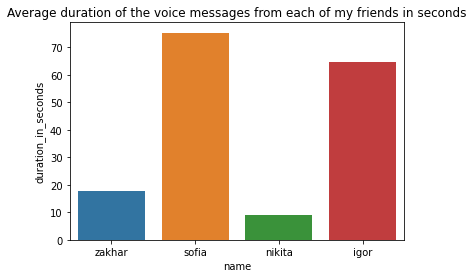

In [19]:
df_sofia_voice_to_me = df_sofia_to_me.loc[df_sofia['type'] == 'voice']
df_zakhar_voice_to_me = df_zakhar_to_me.loc[df_zakhar['type'] == 'voice']
df_nikita_voice_to_me = df_nikita_to_me.loc[df_nikita['type'] == 'voice']
df_igor_voice_to_me = df_igor_to_me.loc[df_igor['type'] == 'voice']
sum_sofia = 0
sum_zakhar = 0
sum_nikita = 0
sum_igor = 0
for i in range(df_sofia_voice_to_me.shape[0]):
    sum_sofia+=df_sofia_voice_to_me.iloc[i]['duration']
for i in range(df_nikita_voice_to_me.shape[0]):
    sum_nikita+=df_nikita_voice_to_me.iloc[i]['duration']
for i in range(df_zakhar_voice_to_me.shape[0]):
    sum_zakhar+=df_zakhar_voice_to_me.iloc[i]['duration']
for i in range(df_igor_voice_to_me.shape[0]):
    sum_igor+=df_igor_voice_to_me.iloc[i]['duration']
    
    
sum_sofia/df_sofia_voice_to_me.shape[0]  


data_avg_voice = {'name': ['zakhar','sofia','nikita','igor'],
                   'duration_in_seconds': [sum_zakhar/df_zakhar_voice_to_me.shape[0] ,
                   sum_sofia/df_sofia_voice_to_me.shape[0] ,
                   sum_nikita/df_nikita_voice_to_me.shape[0] ,
                    sum_igor/df_igor_voice_to_me.shape[0]] }
df_avg_voice = pd.DataFrame(data_avg_voice)
sns.barplot(data=df_avg_voice, x="name", y="duration_in_seconds").set(title='Average duration of the voice messages from each of my friends in seconds')

## Question 15
### Track the level of Ukrainan in the dialogs 
#### Why did I choose this question? 
It is a very interesting, because 2/4 my friends speak ukrainian all the time, so in two chats the level of ukrainian should me high and on the other hand, in two other chats it is supposed to be close to zero, because we both do not speak ukrainian while chatting with friends.

[Text(0.5, 1.0, 'Level of ukrainian in chats with my friends')]

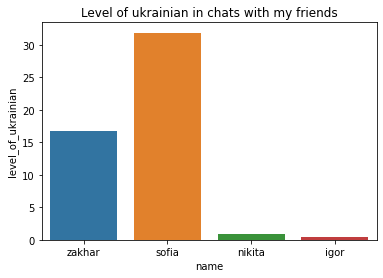

In [20]:
df_sofia_e = df_sofia.loc[(df_sofia['message'].str.contains('Є')) | (df_sofia['message'].str.contains('є')) | (df_sofia['message'].str.contains('і')) | (df_sofia['message'].str.contains('І'))]
df_igor_e = df_igor.loc[(df_igor['message'].str.contains('Є')) | (df_igor['message'].str.contains('є')) | (df_igor['message'].str.contains('і')) | (df_igor['message'].str.contains('І'))]
df_nikita_e = df_nikita.loc[(df_nikita['message'].str.contains('Є')) | (df_nikita['message'].str.contains('є')) | (df_nikita['message'].str.contains('і')) | (df_nikita['message'].str.contains('І'))]
df_zakhar_e = df_zakhar_clear.loc[(df_zakhar_clear['message'].str.contains('Є')) | (df_zakhar_clear['message'].str.contains('є')) | (df_zakhar_clear['message'].str.contains('і')) | (df_zakhar_clear['message'].str.contains('І'))]

data_friends_ukr = {'name': ['zakhar','sofia','nikita','igor'],
                   'level_of_ukrainian': [df_zakhar_e.shape[0]/df_zakhar_clear.shape[0]*100,
                   df_sofia_e.shape[0]/df_sofia.shape[0]*100,
                   df_nikita_e.shape[0]/df_nikita.shape[0]*100,
                    df_igor_e .shape[0]/df_igor.shape[0]*100]}
df_friends_ukr = pd.DataFrame(data_friends_ukr);

sns.barplot(data=df_friends_ukr, x="name", y="level_of_ukrainian").set(title='Level of ukrainian in chats with my friends')

## Question 16
### Who laughs the most? (among close friends)
#### Why did I choose this question? 
Because it is fun to know.

[Text(0.5, 1.0, 'Who laughs the most among my close friends?')]

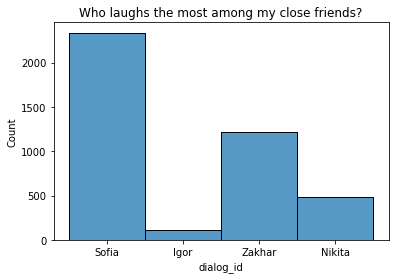

In [21]:
def name_changer2(id):
    names = df_meta[['users']]
    normal_names = names.loc[names['users'].str.contains(id)]
    if normal_names.empty:
        return "Igor"
    normal_names=normal_names.reset_index(drop=True)
    list = normal_names['users'][0].split(',')
    return list[1][16:-1]



df_friends_laugh = df.loc[(df['dialog_id'] == 356803362) | (df['dialog_id'] == 346039675) | (df['dialog_id'] == 460364073) | (df['dialog_id'] == 338959697)]

df_friends['message'] = df_friends['message'].astype(str)

df_friends_laugh = df_friends_laugh.loc[(df_friends_laugh['message'].str.contains('хах')) | (df_friends_laugh['message'].str.contains('аха'))]
df_friends_laugh = df_friends_laugh.loc[df_friends_laugh['to_id'] == '381081723']

df_friends_laugh['dialog_id'] = df_friends_laugh['dialog_id'].astype(str)
df_friends_laugh['dialog_id'] = df_friends_laugh['dialog_id'].apply(name_changer2)
df_friends_laugh.head()
sns.histplot(data = df_friends_laugh, x = 'dialog_id').set(title='Who laughs the most among my close friends?')

## Question 17
### Show distribution of the voice messages sent to me by my close friends


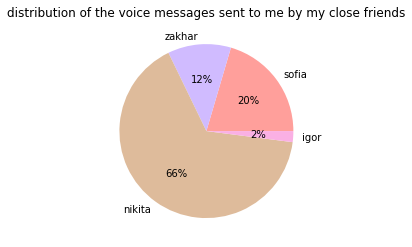

In [22]:


data_voice = {'name':['sofia', 'zakhar', 'nikita', 'igor'],
             'quantity':[df_sofia_voice_to_me.shape[0], df_zakhar_voice_to_me.shape[0], df_nikita_voice_to_me.shape[0],df_igor_voice_to_me.shape[0]]}
df_voice = pd.DataFrame(data_voice)


colors = sns.color_palette('pastel')[3:7]
plt.pie(df_voice['quantity'], labels=df_voice['name'], colors = colors, autopct='%.0f%%')
plt.title('distribution of the voice messages sent to me by my close friends')
plt.show()

## Question 18
### Analyze dialog with studybuddy.
#### Why did I choose this question?
I know one guy from my university and we chat only about studies. The goal is to check if the activity in the chat matches the tough months in the university.

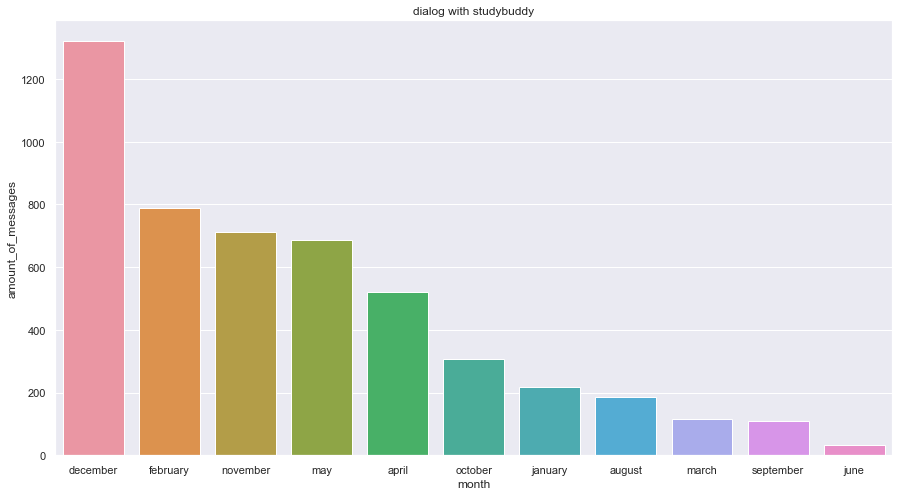

In [23]:
def month_rename(str):
    if(month_id(str) == '01'):
        return 'january'
    if(month_id(str) == '02'):
        return 'february'
    if(month_id(str) == '03'):
        return 'march'
    if(month_id(str) == '04'):
        return 'april'
    if(month_id(str) == '05'):
        return 'may'
    if(month_id(str) == '06'):
        return 'june'
    if(month_id(str) == '07'):
        return 'july'
    if(month_id(str) == '08'):
        return 'august'
    if(month_id(str) == '09'):
        return 'september'
    if(month_id(str) == '10'):
        return 'october'
    if(month_id(str) == '11'):
        return 'november'
    if(month_id(str) == '12'):
        return 'december'
df_vlad = df.loc[df['dialog_id'] == 535972821]
df_vlad['date'] = df_vlad['date'].apply(month_rename)

df_vlad_month = df_vlad['date'].value_counts().rename_axis('month').reset_index(name='amount_of_messages')
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.barplot(data=df_vlad_month, x="month", y="amount_of_messages").set(title='dialog with studybuddy')


#### Conclusion:
##### Who texts we the most during the night:
I was expecting Zakhar to be the lowest here, because he usually sleeps at night. And the result perfectly matched my expectations.
##### Voice messages:
From my experience Nikita sends me loads of short voice messages and Sofia sends the longest ones. Igor doesn't send them at all, but he sent me his choir recordings a few times, so the average duration is deceptively high.
The results reflect my thoughts.
##### Ukrainian:
The bars on the people who talk in Ukraninan most of the time is very high and vice-versa. So, this plot matches my expectations.
##### Laugh:
This totally the fun one, so I had no idea what it would show. However, the results are logical in a way.
##### Studybuddy:
As we can see on the chart, we mostly talk in the most difficult times for students - december,november, may and surprisingly february. The most easy months for us are januray, august, september, march,july and june. It is because we had holidays from june to september and we didn't study this march. We also had holidays half of the january. So it is really how I thought it would be, we chat significantly more during the tough times for students.

## Topic 4. Me

## Question 19
### Who of my close friends do I mention the most?


[Text(0.5, 1.0, 'Who of my friends do I mention the most?')]

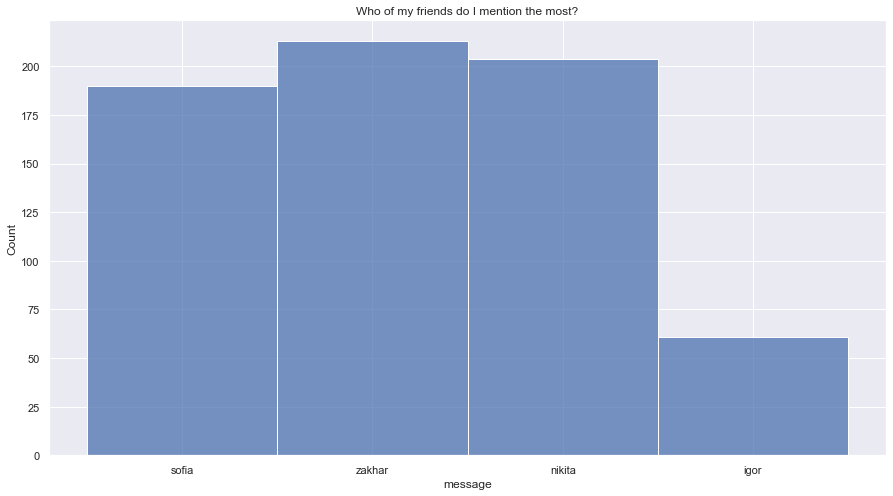

In [24]:
def id_friend(str):
    if('соня' in str or 'сони' in str or 'Соня' in str or 'Сони' in str or 'София' in str or 'Соне' in str 
      or 'соне' in str or 'соней' in str or 'Соней' in str):
        return 'sofia'
    if('Захар' in str or 'захар' in str or 'назар' in str or 'назир' in str or 'козак' in str):
        return 'zakhar'
    if('Никит' in str or 'никит' in str or 'Мыкыт' in str or 'мыкыт' in str or 'федьк' in str):
        return 'nikita'
    if('Игор' in str or 'игор' in str):
        return 'igor'


df_me_friends = df_me.loc[(df_me['message'].str.contains('соня')) |
                         (df_me['message'].str.contains('сони')) |
                         (df_me['message'].str.contains('Соня')) |
                         (df_me['message'].str.contains('Сони')) |
                         (df_me['message'].str.contains('София')) |
                         (df_me['message'].str.contains('Соне')) |
                         (df_me['message'].str.contains('соне')) |
                         (df_me['message'].str.contains('соней')) |
                         (df_me['message'].str.contains('Соней')) |
                         (df_me['message'].str.contains('Захар')) |
                         (df_me['message'].str.contains('Захара')) |
                         (df_me['message'].str.contains('Захаре')) |
                         (df_me['message'].str.contains('Захаром')) |
                         (df_me['message'].str.contains('Назар')) |
                         (df_me['message'].str.contains('Назир')) |
                         (df_me['message'].str.contains('Козак')) |
                         (df_me['message'].str.contains('захар')) |
                         (df_me['message'].str.contains('захара')) |
                         (df_me['message'].str.contains('захаре')) |
                         (df_me['message'].str.contains('захаром')) |
                         (df_me['message'].str.contains('назир')) |
                         (df_me['message'].str.contains('назар')) |
                         (df_me['message'].str.contains('козак')) |
                         (df_me['message'].str.contains('никита')) |
                         (df_me['message'].str.contains('никиты')) |
                         (df_me['message'].str.contains('никите')) |
                         (df_me['message'].str.contains('никитой')) |
                         (df_me['message'].str.contains('мыкыт')) |
                         (df_me['message'].str.contains('Никит')) |
                         (df_me['message'].str.contains('Игор')) |
                         (df_me['message'].str.contains('игор'))|
                         (df_me['message'].str.contains('федьк'))]
                         
df_me_friends['message'] = df_me_friends['message'].apply(id_friend)
sns.histplot(data = df_me_friends, x = 'message').set(title='Who of my friends do I mention the most?')

## Question 20*
### Dialogs that I started before/after entering the university.
#### Why did I choose this question? 
It is interesting to see if I started talking to more people because of the university.

'when did I started my chats'

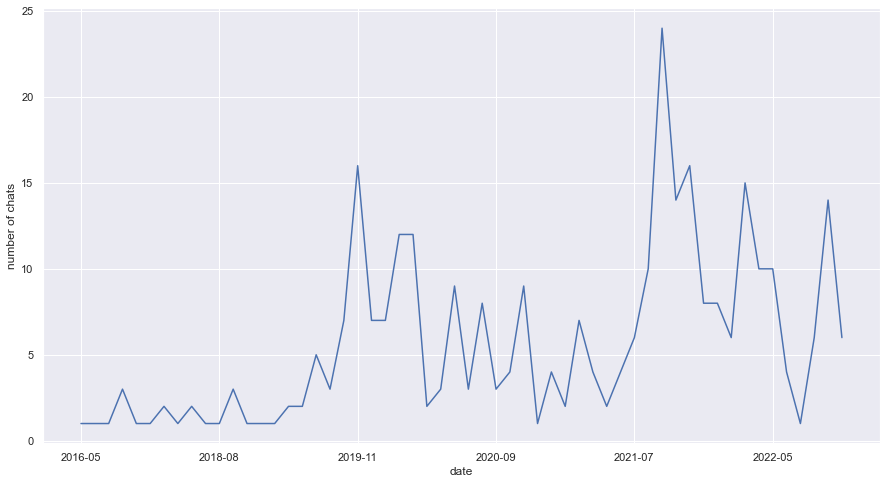

In [25]:

df_dialogs = df['dialog_id'].value_counts().rename_axis('quantity').reset_index(name='amount')

df_by_dialogs = df.copy()
df_by_dialogs.sort_values(by=['dialog_id'])
list_dates = []

list_dialogs = df_dialogs['quantity']
for word in list_dialogs:
    df_temp = df.loc[df['dialog_id'] == word]
    list_dates.append(df_temp.iloc[-1]['date'])
df_dates1 = pd.DataFrame(list_dates)
df_dates1[0] = df_dates1[0].apply(cut_month)
df_dates2 = df_dates1[0].value_counts().rename_axis('date').reset_index(name='amount')

df_dates2.astype({'date': 'datetime64[ns]'})
df_dates2 = df_dates2.sort_values(by=['date'])
df_dates2 = df_dates2.set_index('date')

f.set_figwidth(10)
f.set_figheight(5)
plt.ylabel('number of chats')
df_dates2['amount'].plot()
'when did I started my chats'

#### Conclusion:
##### dialogs that I started before/after entering the university:
As we can see on the graph, I started a lot of chats in the september/october of 2021, because that is the time when I entered my university.
##### who of my friends so I mention the most:
It is unfortunate that Igor is mentioned so rarely. But that is not surprising, because my other friends know close to nothing about him.

### Full conclusion:

In this piece of art I analyzed data from my telegram messages more deeply. I also got to know a lot of interesring details about my friend through analyzing our chats. Then I reviewed my tiktok stats. A very important part of this work is that I compared my friends on some interesting questions. I have learnt how to work with pandas better and I had lots of fun!  

## Homework #6. Improve behaviour exploration
#### Author: `Anton Marynych`
#### Total time spent on h/w (in minutes): `720`

#### Descripton: this homework is divided into two parts. In the first part I try to do deeper analysis of my TG data. I make few new questions. In the second part I focus on improving my previous researches.

## Part 1. New deeper researches.

## Question 1. 
### What are the main topics in the chat with my friend Zakhar?
#### The goal is to answer this question using TF-IDF analyses. One document equals one day in our chat.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords
import nltk
import json
import glob
import re

In [121]:
def cut_date(str):
    return str[:10]
def remove_stops(text, stops):
    words = text.split()
    final = []
    for word in words:
        if word not in stops and (not('b' in word or 'd' in word or
                                      'f' in word or 'g' in word or 'h' in word or 'j' in word or 
                                      'k' in word or 'l' in word or 'm' in word or 'n' in word or 'q' in word 
                                      or 'r' in word or 's' in word or 't' in word or 'u' in word or 'v' in word 
                                      or 'w' in word or 'z' in word or 'хах' in word or len(word)<5)):
                                  final.append(word)
                                  
            
    final = " ".join(final)
    final = final.translate(str.maketrans("", "", string.punctuation))
    final = "".join([i for i in final if not i.isdigit()])
    final
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)

df_zakhar_day_date = df_zakhar_clear.copy()
df_zakhar_day_date['date'] = df_zakhar_day_date['date'].apply(cut_date)
df_zakhar_day_date.head()
days = []
day_messages  = [df_zakhar_day_date.iloc[0]['message']]

for i in range(df_zakhar_day_date.shape[0]-1):
    if(df_zakhar_day_date.iloc[i]['date'] == df_zakhar_day_date.iloc[i-1]['date']):
        day_messages.append(df_zakhar_day_date.iloc[i]['message'])
    else:
        days.append(day_messages)
        day_messages = [df_zakhar_day_date.iloc[i]['message']]
    
final_days_mes = ""
final_days_list = []
stops = stopwords.words('russian')

for day in days:
    for mes in day:
        final_days_mes += mes + " "
    final_days_list.append(final_days_mes)
    final_days_mes = ""
        
for i in range(len(final_days_list)):
    final_days_list[i] = remove_stops(final_days_list[i],stops)
    
    
    
    

vectorizer = TfidfVectorizer(
                                lowercase=True,
                                max_df=0.05,
                                min_df=2,
                                ngram_range = (1,3),
                                

                            )

vectors = vectorizer.fit_transform(final_days_list)

feature_names = vectorizer.get_feature_names()

dense = vectors.todense()
denselist = dense.tolist()

all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)


true_k = 5

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print(f"Cluster {i}")
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])
       
    


Cluster 0
 оооочень
 ответ
 можем
 конец
 контрактову
 контрактовую
 контрактовій
 контракту
 контратака
 контрится
Cluster 1
 прикольно
 гулять
 впринципі
 давай
 чекай
 дивитись
 смотреть
 круто
 напишешь
 хочеш
Cluster 2
 роналдо
 болеем
 вболіваєм
 роналдо забив
 родриго
 командам
 когось
 пеналь
 наполи
 цікавіше
Cluster 3
 деталь
 імовірність
 того
 знаєм
 путін
 попадають
 ніколи бачив
 стратег
 першим
 другим
Cluster 4
 здається
 раніше
 федька
 третій
 вилітає
 гуляем
 оскільки
 перемога
 будемо
 поганий


## Our topics
#### In this section I am going to analyze the outcome of my TF-IDF analysys of my private chat with Zakhar.  
#### The main problem here was the lack of data in the dataset, so I had to change some values in the code to get the results that mean something. That's why some clusters have different size. When I tested my program 15/20 clusters were meaningless. Basically, I picked up the best results from different tests and combined them into groups for better understanding. 
## Topic 1. Arranging offline/online meetings.
### Cluster 1
 тільки прийшов   
 напишешь будешь готов  
 напишешь будешь  
 будешь готов  
 помиюсь  
 прийшов  
 готов  
### Cluster 2
 давай  
 впринципі  
 контрактовой  
 демеевской  
 напишу  
### Cluster 3
 наберу  
 опоздаю наберу  
 опоздаю  
 попали  
 пенальті  
 позже  
 напишешь  
 контратака  
 контрактову  
 контрактовую
### Cluster 4
 демеевской  
 пожалуйста  
 ближе  
 дивишся  
 курсах  
 метро  
 гулят  
 хмхмхм  
 олимпийской  
 скільки  
#### decription: 
So, the clusters in this topic include the words we need to use when we arrange a meeting. The first cluster has the words that we use for arranging phone or discord call (online meeting). The second, third and fourth clusters have the words that we use for arranging an offline meeting. As you can see there are even the names of locations where we usually meet in Kyiv. 
## Topic 2. Football.
### Cluster 5
 ювентус  
 дивлюсь  
 действительно  
 шахтар  
 аталанта  
 порту  
 пирло  
### Cluster 6
 буває  
 барса  
 конференции  
 футболісти  
 після  
 дивись  
 работает  
 челсі  
 матчі  
 взагалі  
### Cluster 7
 барселоне  
 баварии  
 давай  
 рона  
 трансферы  
 думаю баварии  
 забавная  
 давай давай  
 решить вопрос  
 придется
### Cluster 8
 продадут  
 аталанте  
 некст сезоні  
 головы  
 малиновского  
 летом     
#### decription: 
Here we can see that we talk A LOT about football. In clusters 5,6,7 we can see just the names of football clubs with football-related words. In clusters 7,8 we can actually guess that we were talking about certain transfers of Cristiano Ronaldo and Ruslan Malinovsky respectively. The fact that there are so many football-related clusters prooves my theory that football is our main common interest. 
## Topic 2. Global news.
### Cluster 9
 подписаться прислать  
 прислать  
 прислать новость  
 подписаться прислать новость  
 готов  
 смотрел  
 украине  
 канал  
 украины  
 нравится  
#### decription:
As you can see by the numbers of the clusters related to this topic, we don't really talk about politics and global news. But when comes to politics we mostly talk about Ukraine, which is very logical.
## Topic 4. Studies.
### Cluster 10
 алгоритмы  
 уровня  
 отличное  
 темы  
 горіли  
 книге  
 описание  
 дививмся  
 упражнений  
 интересно смотрел  
### Cluster 11
 ааааа  
 задача  
 задачу  
 завдання  
 більше  
 ху*ня  
 будешь  
 славка  
 насправді  
 контест  
#### decription:
We do talk about studies sometimes and because we both plan to become programmers or something related. In the cluster 10 we can see that we talk about some books with algorythms and some tasks with some descriptions. In the cluster 11 it becomes more specific. Here we discuss problems in some contest (which is probably the codeforces contest) and the name of our mutual friend Slavka also pops up. He is also often writing theese contests, so it makes perfect sense.
## Topic 5. Leisure.
### Cluster 12
 подивись  
 замітив  
 просто подивись  
 матча  
 момент  
 курсе  
 происходит  
 шедевр  
 відоси  
 привіт  
### Cluster 13
 назаре  
 серия  
 новая серия  
 назаре назаре  
 хочешь смотреть  
 анимесериал  
 дивився серію 
### Cluster 14 
 глави  
 розумію розумію  
 можна підозрюю  
 виходять  
 сторони  
 наверняка  
 моменту  
 выходят  
 спіши  
 спойлеры  
#### decription:
In this clusters there are some assumptions to make on what our other mutual interests are.   
First of all, we often send funny (or not) videos to each other. This is visible in cluster 12.  
In cluster 13 we can see that we talk a lot about anime. In cluster 14 the topic is manga chapters that are coming out soon.
#### Conclusion:
My TF-IDF anylysis does not work very well because of the small size of the dataset. However, I managed to get some valuable results. With the information that I picked it is easy to understand what do we talk about most of the time.


## Question 2
### When my TG day starts and ends?


'when my TG day starts'

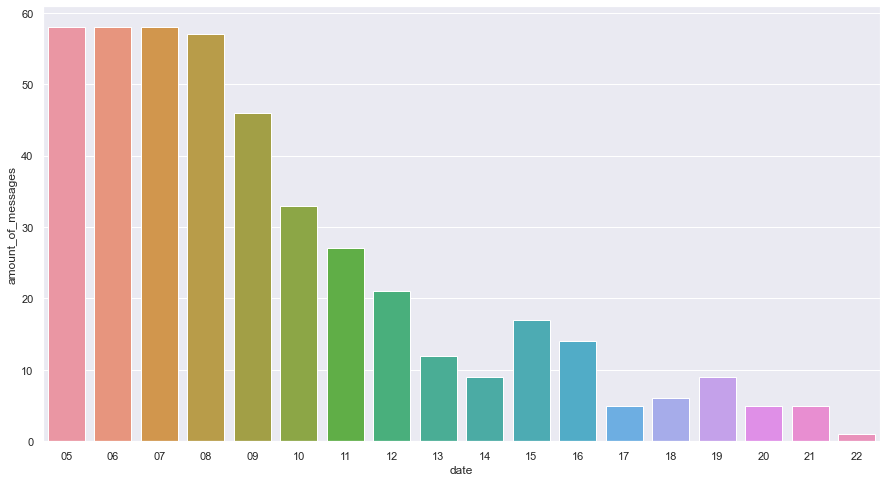

In [45]:
def hour_cutter(str):
    return str[:2]
df_my_messages = df.copy()
df_my_messages['from_id'] = df_my_messages['from_id'].astype(str)
df_my_messages = df_my_messages.loc[df_my_messages['from_id'].str.contains('381081723')]
df_my_messages.astype({'date': 'datetime64[ns]'})
df_my_messages = df_my_messages.sort_values(by=['date'])
df_my_messages['date'] = df_my_messages['date'].astype(str)
df_my_messages.head()
starts = []
finishes = []

for i in range(df_my_messages.shape[0]):
    if((df_my_messages.iloc[i]['date'][:10] != df_my_messages.iloc[i-1]['date'][:10]) & (int(df_my_messages.iloc[i]['date'][11:13])>4)):
        starts.append(df_my_messages.iloc[i]['date'][11:16])
        if(int(df_my_messages.iloc[i-1]['date'][11:13])>5):
            finishes.append(df_my_messages.iloc[i-1]['date'][11:13])         
        
    if((abs(int(df_my_messages.iloc[i]['date'][11:13]) - int(df_my_messages.iloc[i-1]['date'][11:13])) > 6) & (int(df_my_messages.iloc[i]['date'][11:13])<5)):
        finishes.append(df_my_messages.iloc[i]['date'][11:13])
    if((df_my_messages.iloc[i]['date'][:10] != df_my_messages.iloc[i-1]['date'][:10]) & (int(df_my_messages.iloc[i]['date'][11:13])>20)):
        finishes.append(df_my_messages.iloc[i-1]['date'][11:13])
        
data = {'start':starts}
data1 = {'finish':finishes}
df_my_day = pd.DataFrame(data)
df_my_day1 = pd.DataFrame(data1)
df_my_starts = df_my_day['start'].value_counts().rename_axis('date').reset_index(name='amount_of_messages')
df_my_finishes = df_my_day1['finish'].value_counts().rename_axis('date').reset_index(name='amount_of_messages')
df_my_starts['date'] = df_my_starts['date'].apply(hour_cutter)
df_my_starts = df_my_starts['date'].value_counts().rename_axis('date').reset_index(name='amount_of_messages')
df_my_starts = df_my_starts.sort_values(by=['date'])
sns.barplot(data=df_my_starts, x="date", y="amount_of_messages")
'when my TG day starts'

'when my TG day ends'

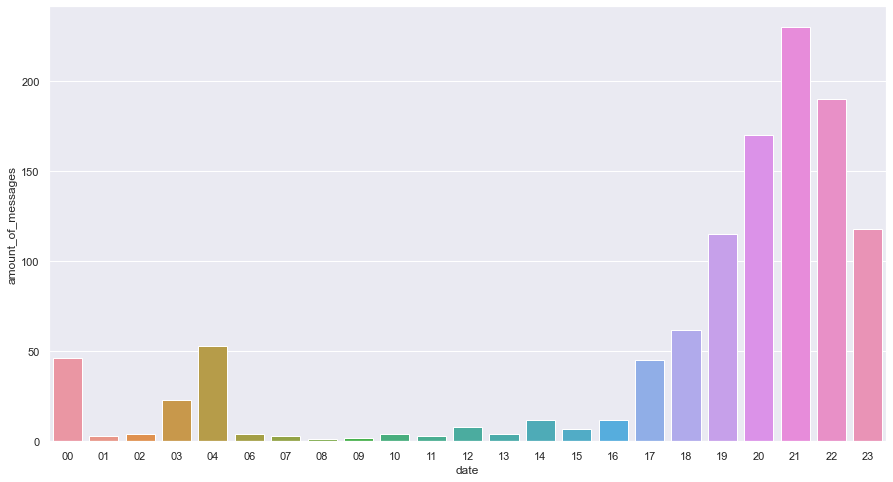

In [46]:
df_my_finishes = df_my_finishes.sort_values(by=['date'])
sns.barplot(data=df_my_finishes, x="date", y="amount_of_messages")
'when my TG day ends'

#### Conclusion: 
I used an algorytm based on common sense, which showed that I usually start my TG day around 5-8 in the morning.The fact that my TG day ends mostly around 20-22 is very surprising to me. I thought it would be later. However, my algorythm showed some decent logical results, which I am very proud of.


## Question 3 
### Finding differences between chatting with male and female friends.


In [82]:
df_girls = df.loc[(df['dialog_id'] == '346039675') | (df['dialog_id'] == '518776919') | (df['dialog_id'] == '535972821')]
df_boys = df.loc[(df['dialog_id'] == '460364073') | (df['dialog_id'] == '356803362') | (df['dialog_id'] == '338959697')]
df_girls_time = df_girls.copy()
df_boys_time = df_boys.copy()
df_girls_time['date'] = df_girls_time['date'].astype(str)
df_girls_time['date'] = df_girls_time['date'].apply(cut_time)

df_boys_time['date'] = df_boys_time['date'].astype(str)
df_boys_time['date'] = df_boys_time['date'].apply(cut_time)



#### The charts below show, our activity in chats with girls and boys respectively. Each bar represents one hour.

'girls plot'

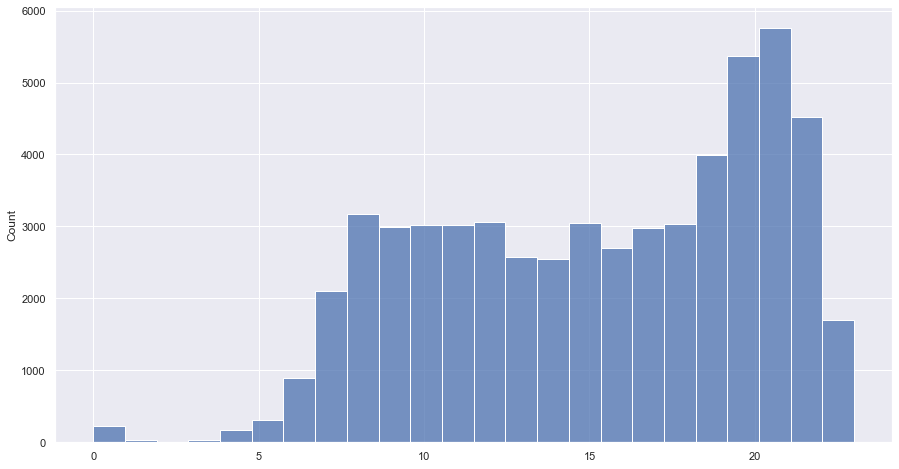

In [83]:
arr = df_girls_time['date']
arr_final = []
for i in arr:
    first = int(i[0:2])
    arr_final.append(first)  
sns.histplot(arr_final, bins=24)    
'girls plot'    

'boys plot'

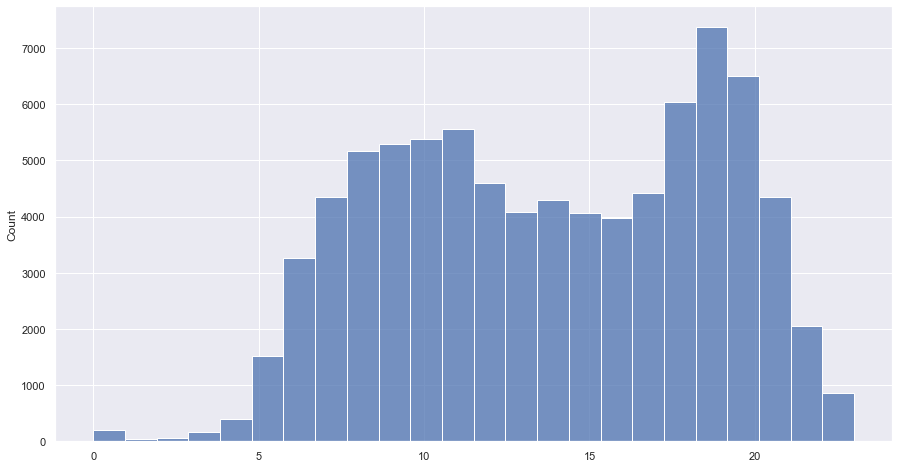

In [84]:
arr = df_boys_time['date']
arr_final = []
for i in arr:
    first = int(i[0:2])
    arr_final.append(first)  
sns.histplot(arr_final, bins=24)    
'boys plot'   

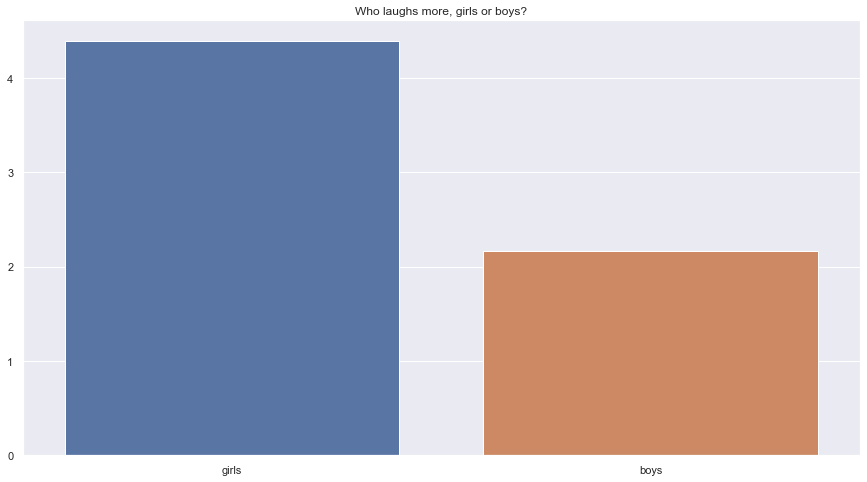

In [87]:

df_boys['message'] = df_boys['message'].astype(str)
df_girls['message'] = df_girls['message'].astype(str)
df_boys_laugh = df_boys.copy()
df_boys_laugh = df_boys_laugh.loc[(df_boys_laugh['message'].str.contains('хах')) | (df_boys_laugh['message'].str.contains('аха'))]
df_boys_laugh = df_boys_laugh.loc[df_boys_laugh['to_id'] == '381081723']

df_girls_laugh = df_girls.copy()
df_girls_laugh = df_girls_laugh.loc[(df_girls_laugh['message'].str.contains('хах')) | (df_girls_laugh['message'].str.contains('аха'))]
df_girls_laugh = df_girls_laugh.loc[df_girls_laugh['to_id'] == '381081723']

boys_girls_laugh = {'gender':['girls','boys'],
                   'percentage':[(df_girls_laugh.shape[0])/(df_girls.shape[0])*100, (df_boys_laugh.shape[0])/(df_boys.shape[0])*100]}
df_boys_girls_laugh = pd.DataFrame(boys_girls_laugh)
df_boys_girls_laugh.head()
plot = sns.barplot(data=boys_girls_laugh, x="gender", y="percentage").set(title='Who laughs more, girls or boys?')

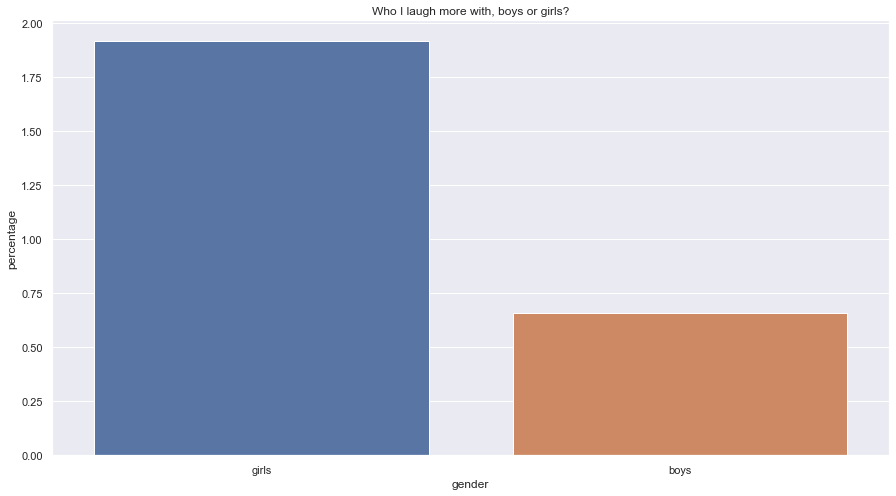

In [91]:
df_me_boys_laugh = df_boys.copy()
df_me_boys_laugh['from_id'] = df_me_boys_laugh['from_id'].astype(str)
df_me_boys_laugh = df_me_boys_laugh.loc[(df_me_boys_laugh['message'].str.contains('хах')) | (df_me_boys_laugh['message'].str.contains('аха'))]
df_me_boys_laugh = df_me_boys_laugh.loc[df_me_boys_laugh['from_id'].str.contains('381081723')]

df_me_girls_laugh = df_girls.copy()
df_me_girls_laugh['from_id'] = df_me_girls_laugh['from_id'].astype(str)
df_me_girls_laugh = df_me_girls_laugh.loc[(df_me_girls_laugh['message'].str.contains('хах')) | (df_me_girls_laugh['message'].str.contains('аха'))]
df_me_girls_laugh = df_me_girls_laugh.loc[df_me_girls_laugh['from_id'].str.contains('381081723')]

boys_girls_laugh_me = {'gender':['girls','boys'],
                   'percentage':[(df_me_girls_laugh.shape[0])/(df_girls.shape[0])*100, (df_me_boys_laugh.shape[0])/(df_boys.shape[0])*100]}

df_boys_girls_laugh_me = pd.DataFrame(boys_girls_laugh_me)
df_boys_girls_laugh_me.head()
plot = sns.barplot(data=df_boys_girls_laugh_me, x="gender", y="percentage").set(title='Who I laugh more with, boys or girls?')

#### Conclusion:
Here I compared my chats with male and female friends. I used 3 private chats for each group. The results show that
there is no major difference activity of chatting with boys or girls during the day. The charts show pretty much the same information. However, I found some interesting details when I compared laughing in chats between girls and boys. It turned out that girls laugh in the chats way more than boys do and I laugh in the chats with girls way more than in the chats with boys. I found this information very interesting.

## Part 2. Improving previous researches.

## Question 4 
### Analyze languages used in chats with my friends.

[Text(0.5, 1.0, 'Language levels in chats with my friends')]

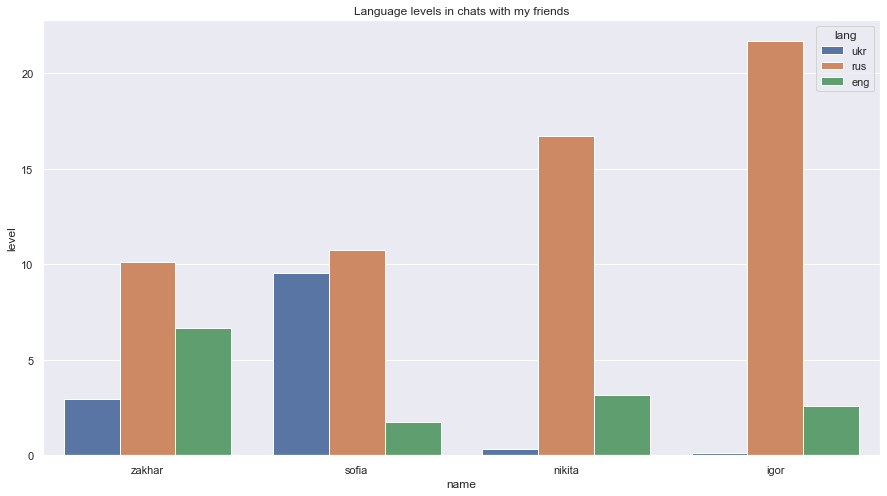

In [118]:
df_sofia_ukr = df_sofia.loc[(df_sofia['message'].str.contains('Є')) | (df_sofia['message'].str.contains('є'))]
df_igor_ukr = df_igor.loc[(df_igor['message'].str.contains('Є')) | (df_igor['message'].str.contains('є'))]
df_nikita_ukr = df_nikita.loc[(df_nikita['message'].str.contains('Є')) | (df_nikita['message'].str.contains('є'))]
df_zakhar_ukr = df_zakhar_clear.loc[(df_zakhar_clear['message'].str.contains('Є')) | (df_zakhar_clear['message'].str.contains('є'))]


df_sofia_rus = df_sofia.loc[(df_sofia['message'].str.contains('Ы')) | (df_sofia['message'].str.contains('ы'))]
df_igor_rus = df_igor.loc[(df_igor['message'].str.contains('Ы')) | (df_igor['message'].str.contains('ы'))]
df_nikita_rus = df_nikita.loc[(df_nikita['message'].str.contains('Ы')) | (df_nikita['message'].str.contains('ы'))]
df_zakhar_rus = df_zakhar_clear.loc[(df_zakhar_clear['message'].str.contains('Ы')) | (df_zakhar_clear['message'].str.contains('ы'))]

df_sofia['message'] = df_sofia['message'].str.lower()
df_igor['message'] = df_igor['message'].str.lower()
df_nikita['message'] = df_nikita['message'].str.lower()
df_zakhar_clear['message'] = df_zakhar_clear['message'].str.lower()

df_sofia_eng = df_sofia.loc[(df_sofia['message'].str.contains('d')) | (df_sofia['message'].str.contains('f')) | (df_sofia['message'].str.contains('g') | (df_sofia['message'].str.contains('h')) | (df_sofia['message'].str.contains('j')) | (df_sofia['message'].str.contains('l'))) | (df_sofia['message'].str.contains('k')) | (df_sofia['message'].str.contains('m')) | (df_sofia['message'].str.contains('n')) | (df_sofia['message'].str.contains('r')) | (df_sofia['message'].str.contains('s')) | (df_sofia['message'].str.contains('t')) | (df_sofia['message'].str.contains('q') | (df_sofia['message'].str.contains('u')) | (df_sofia['message'].str.contains('w')) | (df_sofia['message'].str.contains('v')) | (df_sofia['message'].str.contains('z')))]
df_igor_eng = df_igor.loc[(df_igor['message'].str.contains('d')) | (df_igor['message'].str.contains('f')) | (df_igor['message'].str.contains('g') | (df_igor['message'].str.contains('h')) | (df_igor['message'].str.contains('j')) | (df_igor['message'].str.contains('l'))) | (df_igor['message'].str.contains('k')) | (df_igor['message'].str.contains('m')) | (df_igor['message'].str.contains('n')) | (df_igor['message'].str.contains('r')) | (df_igor['message'].str.contains('s')) | (df_igor['message'].str.contains('t')) | (df_igor['message'].str.contains('q') | (df_igor['message'].str.contains('u')) | (df_igor['message'].str.contains('w')) | (df_igor['message'].str.contains('v')) | (df_igor['message'].str.contains('z')))]
df_nikita_eng = df_nikita.loc[(df_nikita['message'].str.contains('d')) | (df_nikita['message'].str.contains('f')) | (df_nikita['message'].str.contains('g') | (df_nikita['message'].str.contains('h')) | (df_nikita['message'].str.contains('j')) | (df_nikita['message'].str.contains('l'))) | (df_nikita['message'].str.contains('k')) | (df_nikita['message'].str.contains('m')) | (df_nikita['message'].str.contains('n')) | (df_nikita['message'].str.contains('r')) | (df_nikita['message'].str.contains('s')) | (df_nikita['message'].str.contains('t')) | (df_nikita['message'].str.contains('q') | (df_nikita['message'].str.contains('u')) | (df_nikita['message'].str.contains('w')) | (df_nikita['message'].str.contains('v')) | (df_nikita['message'].str.contains('z')))]
df_zakhar_eng = df_zakhar_clear.loc[(df_zakhar_clear['message'].str.contains('d')) | (df_zakhar_clear['message'].str.contains('f')) | (df_zakhar_clear['message'].str.contains('g') | (df_zakhar_clear['message'].str.contains('h')) | (df_zakhar_clear['message'].str.contains('j')) | (df_zakhar_clear['message'].str.contains('l'))) | (df_zakhar_clear['message'].str.contains('k')) | (df_zakhar_clear['message'].str.contains('m')) | (df_zakhar_clear['message'].str.contains('n')) | (df_zakhar_clear['message'].str.contains('r')) | (df_zakhar_clear['message'].str.contains('s')) | (df_zakhar_clear['message'].str.contains('t')) | (df_zakhar_clear['message'].str.contains('q') | (df_zakhar_clear['message'].str.contains('u')) | (df_zakhar_clear['message'].str.contains('w')) | (df_zakhar_clear['message'].str.contains('v')) | (df_zakhar_clear['message'].str.contains('z')))]



data_friends_lang = {'name': ['zakhar','sofia','nikita','igor'],
                   'ukr': [df_zakhar_ukr.shape[0]/df_zakhar_clear.shape[0]*100,
                   df_sofia_ukr.shape[0]/df_sofia.shape[0]*100,
                   df_nikita_ukr.shape[0]/df_nikita.shape[0]*100,
                    df_igor_ukr.shape[0]/df_igor.shape[0]*100],
                    'rus': [df_zakhar_rus.shape[0]/df_zakhar_clear.shape[0]*100,
                   df_sofia_rus.shape[0]/df_sofia.shape[0]*100,
                   df_nikita_rus.shape[0]/df_nikita.shape[0]*100,
                    df_igor_rus.shape[0]/df_igor.shape[0]*100],
                    'eng': [df_zakhar_eng.shape[0]/df_zakhar_clear.shape[0]*100,
                   df_sofia_eng.shape[0]/df_sofia.shape[0]*100,
                   df_nikita_eng.shape[0]/df_nikita.shape[0]*100,
                    df_igor_eng.shape[0]/df_igor.shape[0]*100]
                    }

data_friends_lang_right = {'name': ['zakhar','sofia','nikita','igor', 'zakhar','sofia','nikita','igor', 'zakhar','sofia','nikita','igor'],
                          'lang':['ukr','ukr','ukr','ukr','rus','rus','rus','rus','eng','eng','eng','eng'],
                          'level':[df_zakhar_ukr.shape[0]/df_zakhar_clear.shape[0]*100,
                   df_sofia_ukr.shape[0]/df_sofia.shape[0]*100,
                   df_nikita_ukr.shape[0]/df_nikita.shape[0]*100,
                    df_igor_ukr.shape[0]/df_igor.shape[0]*100,
                       df_zakhar_rus.shape[0]/df_zakhar_clear.shape[0]*100,
                   df_sofia_rus.shape[0]/df_sofia.shape[0]*100,
                   df_nikita_rus.shape[0]/df_nikita.shape[0]*100,
                    df_igor_rus.shape[0]/df_igor.shape[0]*100,
                               df_zakhar_eng.shape[0]/df_zakhar_clear.shape[0]*50,
                   df_sofia_eng.shape[0]/df_sofia.shape[0]*50,
                   df_nikita_eng.shape[0]/df_nikita.shape[0]*50,
                    df_igor_eng.shape[0]/df_igor.shape[0]*50]}
df_friends_lang = pd.DataFrame(data_friends_lang_right)


df_friends_lang.head(12)
sns.barplot(data=df_friends_lang, x="name", y="level", hue="lang").set(title='Language levels in chats with my friends')

#### Conclusion:
I've already done the same research about ukrainian language in chats with my friends. Here I added russian and english, because those are the most used languages in theese chats. I've got some interesting results. For example, the level of english in my chat with Zakhar is suprisingly high. And those charts also show that russian is pretty much the only language that is spoken in my chats with Nikita and Igor.

## Question 5
### When do we chat more actively with Zakhar?
#### I plan to add the same graph with the same meaning using the messages from all chats with my other friends which will show if the results are unique or if they are pretty average.

'other friends plot'

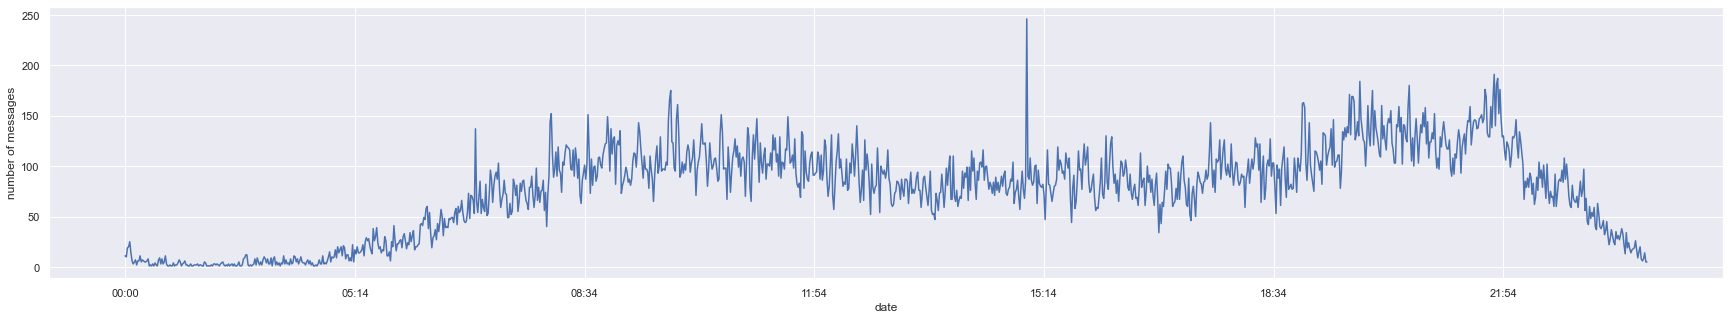

In [52]:
df['dialog_id'] = df['dialog_id'].astype(str)
df_other_friends = df.loc[(df['dialog_id'].str.contains('346039675')) | (df['dialog_id'].str.contains('460364073')) | (df['dialog_id'].str.contains('338959697'))]

df_other_friends['date'] = df_other_friends['date'].astype(str)

df_other_friends['date'] = df_other_friends['date'].apply(cut_time)
df_other_date = df_other_friends['date'].value_counts().rename_axis('date').reset_index(name='amount_of_messages')
df_other_date.astype({'date': 'datetime64[ns]'})
df_other_date = df_other_date.sort_values(by=['date'])
df_other_date = df_other_date.set_index('date')

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.ylabel('number of messages')
df_other_date['amount_of_messages'].plot()
'other friends plot'


'zakhar plot'

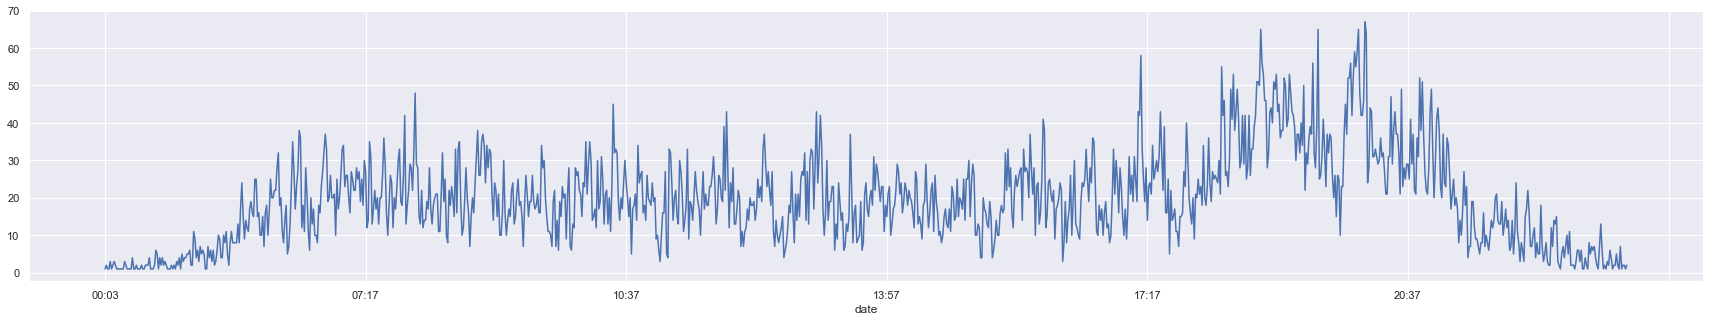

In [54]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
df_zakhar_date['amount_of_messages'].plot()
'zakhar plot'

'other friends plot'

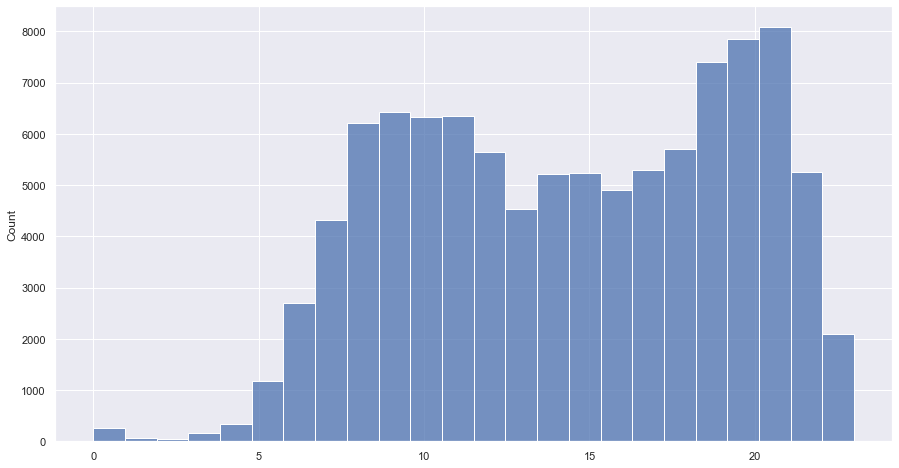

In [55]:
arr = df_other_friends['date']
arr_final = []
for i in arr:
    first = int(i[0:2])
    arr_final.append(first)     
sns.histplot(arr_final, bins=24)    
'other friends plot'    

'zakhar plot'

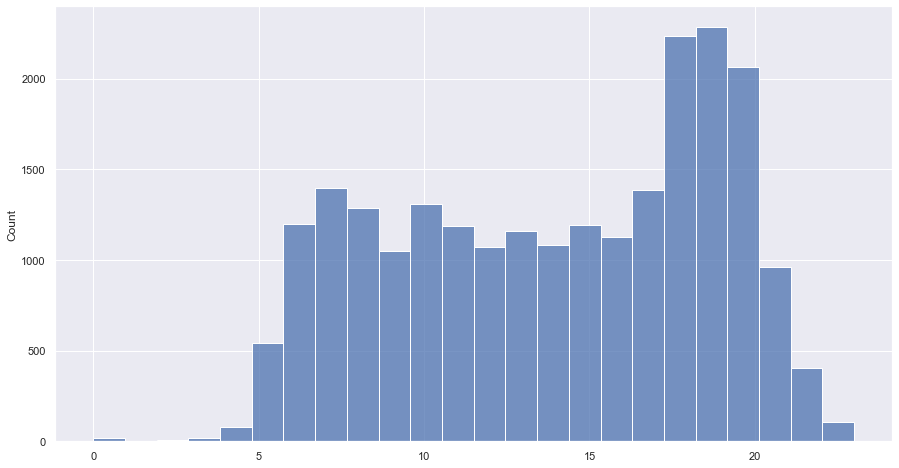

In [56]:
df_zakhar_clear1 = df_zakhar_clear.copy()
df_zakhar_clear1['date'] = df_zakhar_clear1['date'].apply(cut_time)
arr = df_zakhar_clear1['date']
arr_final = []
for i in arr:
    first = int(i[0:2])
    arr_final.append(first)  
# print(arr_final)    
sns.histplot(arr_final, bins=24)    
'zakhar plot'    

#### Conclusion:
I've already done the same research in the homework 5. But here I added the same charts for other friends to see in what way our chat with Zakhar is different from chats with my other friends. The only interesting difference that i got is that in my chat with Zakhar there is a distinct peak of activity around 18-20 o'clock. It is the same on the chart with my other friends, but with Zakhar this peak is way more distinct. And we also don't talk with Zakhar in the afternoon that much.

## Question 6
### When does Zakhar send me tiktoks during the day?
#### The goal is the same as in the previous question.

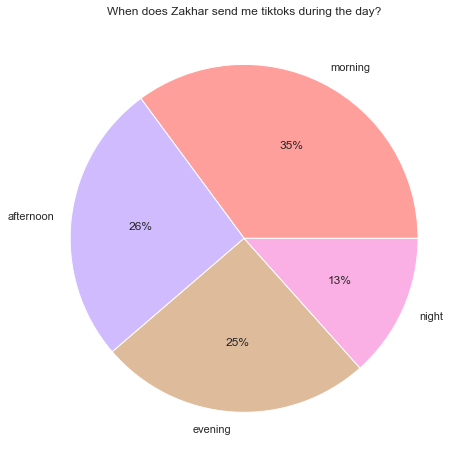

In [57]:
plt.pie(df_zakhar_tiktoks2['amount_of_tiktoks'], labels=df_zakhar_tiktoks2['date'], colors = colors, autopct='%.0f%%')
plt.title('When does Zakhar send me tiktoks during the day?')
plt.show()

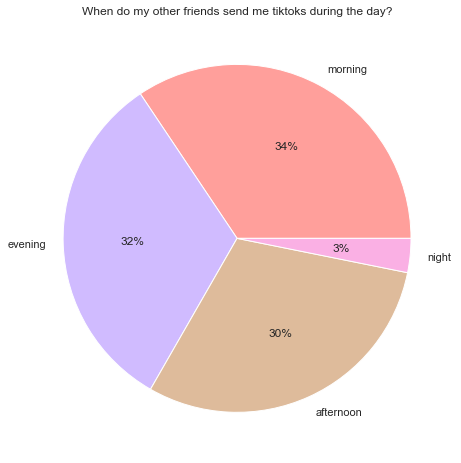

In [58]:
df_other_friends['message'] = df_other_friends['message'].astype(str)
df_other_tiktoks = df_other_friends.loc[df_other_friends['message'].str.contains('tiktok.com')]

df_other_tiktoks = df_other_tiktoks.loc[df_other_tiktoks['to_id'].str.contains('381081723')]

df_other_tiktoks1 = df_other_tiktoks['date'].value_counts().rename_axis('date').reset_index(name='amount_of_tiktoks')

df_other_tiktoks1.astype({'date': 'datetime64[ns]'})
df_other_tiktoks1 = df_other_tiktoks1.sort_values(by=['date'])

df_other_tiktoks1['date'] = df_other_tiktoks1['date'].apply(cutter_hours)
df_other_tiktoks1['date'] = df_other_tiktoks1['date'].apply(gather)
df_other_tiktoks2 = df_other_tiktoks1['date'].value_counts().rename_axis('date').reset_index(name='amount_of_tiktoks')

plt.pie(df_other_tiktoks2['amount_of_tiktoks'], labels=df_other_tiktoks2['date'], colors = colors, autopct='%.0f%%')
plt.title('When do my other friends send me tiktoks during the day?')
plt.show()

#### Conclusion: 
On theese pie charts we can see what makes Zakhar special among my friends in terms of sending me tiktoks. First of all, there is a clear difference between the amount of tiktoks that were sent at night. So, Zakhar sends more tiktoks at night than my other friends. And he also mostly sends tiktoks in the morning, while my other friends send almoust equal amount of tiktoks in the morning, afternoon and evening.

### Overall conclusion:
In this howework I dove deeper into analyzing my TG data. I used TF-IDF analysis, which didn't go very well, however, I managed to get some valuable results. I also analyzed when my TG day starts and ends.  
I tried to find the difference in telegram behaviour between my friends of different genders and I found out that there is way more laugh in my chats with girls.  
I also upgraded my research on language levels in chats with my friends by adding russian and english languages.
The other thing that I added is I created the same charts on two question from the section about Zakhar. This charts let us see in comparison the results from chat with Zakhar and other chats with friends. I used this results to make some assumptions about what unique features does Zakhar have comparing to my other friends.